In [2]:
import glScale
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Open data
df = pd.read_csv('./datasets/iris.csv')
df1 = df[df.columns[0]]
df1 = df1.sort_values()

#visualize scale

In [8]:
df = df.sample(frac=0.5, random_state=1)

In [9]:
df.head()

5.1  3.5  1.4  0.2      Iris-setosa
145  6.3  2.5  5.0  1.9   Iris-virginica
89   5.5  2.6  4.4  1.2  Iris-versicolor
54   5.7  2.8  4.5  1.3  Iris-versicolor
77   6.0  2.9  4.5  1.5  Iris-versicolor
84   6.0  3.4  4.5  1.6  Iris-versicolor

In [6]:
df_sampled.head()

5.1  3.5  1.4  0.2      Iris-setosa
145  6.3  2.5  5.0  1.9   Iris-virginica
89   5.5  2.6  4.4  1.2  Iris-versicolor
54   5.7  2.8  4.5  1.3  Iris-versicolor
77   6.0  2.9  4.5  1.5  Iris-versicolor
84   6.0  3.4  4.5  1.6  Iris-versicolor

In [2]:
df1.head()

12    4.3
41    4.4
37    4.4
7     4.4
40    4.5
Name: 5.1, dtype: float64

In [3]:
df1.shape

(149,)

In [3]:
precision = 100

In [4]:
max_value = df1.max()
print(max_value)
min_value = df1.min()
print(min_value)

7.9
4.3


In [5]:
cdf = []
size = len(df1)
for i,value in enumerate(df1):
    cdf.append(df1[df1<=value].count()/size)

## Plot CDF

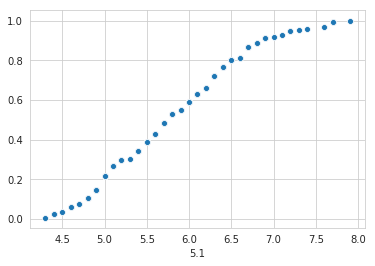

In [6]:
sns.set_style("whitegrid")
sns.scatterplot(df1,cdf)

In [7]:
import tensorflow as tf
import math

In [8]:
Q0 = 0
B0 = 0
M0 = 0
v0 = 0

In [9]:
M0 = df1.iloc[cdf.index(min(cdf, key=lambda x:abs(x-0.5)))]
#find value of Px^-1(0.5): first find index where value is closest to 0.5 than get the value from the raw data

In [10]:
Q0 = 1.000000 #Complex calculus

In [11]:
v0 = math.log(Q0+1,2)

In [12]:
B0 = (math.log( math.pow((1+Q0),math.log(10))-1 )-math.log(Q0))/(M0-min_value)

In [13]:
B0

0.9782190355086609

In [14]:
v0

1.0

In [15]:
X = tf.placeholder(tf.float64)

In [16]:
Y = tf.placeholder(tf.float64)

In [17]:
M = tf.Variable(M0,dtype=tf.float64)
B = tf.Variable(B0,dtype=tf.float64)
v = tf.Variable(v0,dtype=tf.float64)
Q = tf.Variable(Q0,dtype=tf.float64)
print(B.dtype)
print(v.dtype)
print(Q.dtype)

<dtype: 'float64_ref'>
<dtype: 'float64_ref'>
<dtype: 'float64_ref'>


In [18]:
a = tf.subtract(X,M)
b = tf.multiply(a,B)
c = tf.exp(b)
print(Q.dtype)
print(c.dtype)
d = tf.multiply(Q,c)+1
e = tf.pow(d,1/v)
f = 1/e
print(c.dtype)

<dtype: 'float64_ref'>
<dtype: 'float64'>
<dtype: 'float64'>


In [19]:
#cost = tf.pow(f-Y,2) 

In [81]:
error = tf.losses.mean_squared_error(labels = 1-f,predictions = Y)

In [82]:
learning_rate = 1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)


In [83]:
sess = tf.Session()

In [84]:
init = tf.global_variables_initializer() 
sess.run(init)

In [85]:
for i in range(10000):
    sess.run(optimizer,feed_dict={X:df1,Y:cdf})

In [86]:
lg_m = sess.run(M)

In [87]:
lg_q = sess.run(Q)

In [88]:
lg_v = sess.run(v)

In [89]:
lg_b = sess.run(B)

In [90]:
results_y = [1/(math.pow(1+lg_q*math.exp(-lg_b*(i/10-lg_m)),1/lg_v)) for i in range(40,80,1)]
results_x = [i/10 for i in range(40,80)]

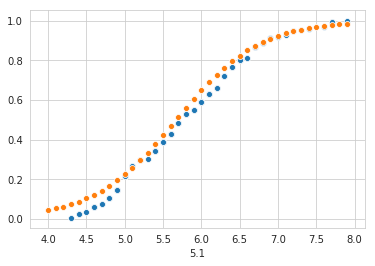

In [91]:
sns.set_style("whitegrid")
sns.scatterplot(df1,cdf)
sns.scatterplot(results_x,results_y)